In [15]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import numpy as np
import math

In [16]:
train_data = TimeSeriesDataFrame.from_path(f'Data/phil_socdata_trainLSTM.csv')
train_data.head()

Loaded data from: Data/phil_socdata_trainLSTM.csv | Columns = 8 / 8 | Rows = 421709 -> 421709


SOC        V     I     T    V_avg  I_avg
item_id timestamp                                                           
SOC     1970-01-01 00:00:00  100.000031  400.125 -1.50  16.5  400.125  -1.50
        1970-01-01 00:00:01  100.000031  400.125 -1.56  16.5  400.125  -1.53
        1970-01-01 00:00:02  100.000031  400.125 -1.62  16.5  400.125  -1.56
        1970-01-01 00:00:03  100.000031  400.125 -1.68  16.5  400.125  -1.59
        1970-01-01 00:00:04  100.000031  400.125 -1.74  16.5  400.125  -1.62

In [17]:
label = 'SOC'
train_data[label].describe()

count    421709.000000
mean         68.186101
std          24.503003
min           0.000000
25%          49.019623
50%          73.333359
75%          89.019638
max         100.000031
Name: SOC, dtype: float64

In [18]:
predictor = TimeSeriesPredictor(prediction_length=10,
                                target="SOC",
                                ignore_time_index=True
                                )

#drop the V_avg and I_avg columns
train_data = train_data.drop(columns=['V_avg','I_avg'])

predictor.fit(train_data, presets='best_quality', time_limit=60)


No path specified. Models will be saved in: "AutogluonModels/ag-20230405_175457/"
================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: best_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': None,
 'hyperparameter_tune_kwargs': {'num_trials': 10,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'hyperparameters': 'best_quality',
 'prediction_length': 10,
 'random_seed': None,
 'target': 'SOC',
 'time_limit': 60}
Provided training data set with 421709 rows, 1 items (item = single time series). Average time series length is 421709.0.
Training artifacts will be saved to: /home/witvoetk/SOCprediction/AutogluonModels/ag-20230405_175457
AutoGluon will save models to AutogluonModels/ag-20230405_175457/
AutoGluon will gauge predictive performance using evaluation metric: 'mean_wQuantileLoss'
	This metric's sign has been flipped to adhere to being 'higher

In [19]:
test_data = TimeSeriesDataFrame(f'Data/phil_socdata_testLSTM.csv')
test_data.head()

Loaded data from: Data/phil_socdata_testLSTM.csv | Columns = 6 / 6 | Rows = 18307 -> 18307


SOC        V     I     T
item_id timestamp                                          
SOC     1970-01-01 00:00:00  97.647087  397.125 -1.35  13.5
        1970-01-01 00:00:01  97.647087  397.125 -1.35  13.5
        1970-01-01 00:00:02  97.647087  397.125 -1.35  13.5
        1970-01-01 00:00:03  97.647087  397.125 -1.35  13.5
        1970-01-01 00:00:04  97.647087  397.125 -1.35  13.5

In [20]:
y_pred = predictor.predict(test_data)
y_pred.head()

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: TemporalFusionTransformer


mean        0.1        0.2        0.3  \
item_id timestamp                                                         
SOC     1900-01-01 05:05:07  13.331537  13.328155  13.328960  13.330254   
        1900-01-01 05:05:08  13.331570  13.328162  13.328974  13.330175   
        1900-01-01 05:05:09  13.331582  13.328168  13.328981  13.330133   
        1900-01-01 05:05:10  13.331587  13.328171  13.328987  13.330112   
        1900-01-01 05:05:11  13.331589  13.328172  13.328993  13.330102   

                                   0.4        0.5        0.6        0.7  \
item_id timestamp                                                         
SOC     1900-01-01 05:05:07  13.330401  13.331537  13.333875  13.333343   
        1900-01-01 05:05:08  13.330372  13.331570  13.333809  13.333415   
        1900-01-01 05:05:09  13.330368  13.331582  13.333780  13.333447   
        1900-01-01 05:05:10  13.330371  13.331587  13.333766  13.333463   
        1900-01-01 05:05:11  13.330377  13.331589  13.333760  13.333470   

                                   0.8        0.9  
item_id timestamp                                  
SOC     1900-01-01 05:05:07  13.331282  13.333893  
        1900-01-01 05:05:08  13.331225  13.333921  
        1900-01-01 05:05:09  13.331193  13.333949  
        1900-01-01 05:05:10  13.331178  13.333972  
        1900-01-01 05:05:11  13.331174  13.333991

In [21]:
predictor.evaluate(test_data)

Model not specified in predict, will default to the model with the best validation score: TemporalFusionTransformer


-0.00010470281926864162

In [22]:
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,TemporalFusionTransformer,-0.000105,-0.000029,0.129628,0.363127,7.762802,7
1,SeasonalNaive,-0.002135,-0.009907,5.191964,3.111771,0.000247,2
2,Naive,-0.002135,-0.009907,2.875815,3.804099,0.000292,1
3,Theta/T1,-0.002210,-0.009902,1.001933,19.692640,0.000275,4
4,ARIMA,-0.002565,-0.010148,0.915862,50.485954,0.000395,5
5,ETS,-0.002803,-0.009934,2.816763,4.984004,0.001280,3
6,DeepAR/T1,-0.117356,-0.110197,0.085516,0.377995,5.891390,6


TypeError: 'value' must be an instance of str or bytes, not a tuple

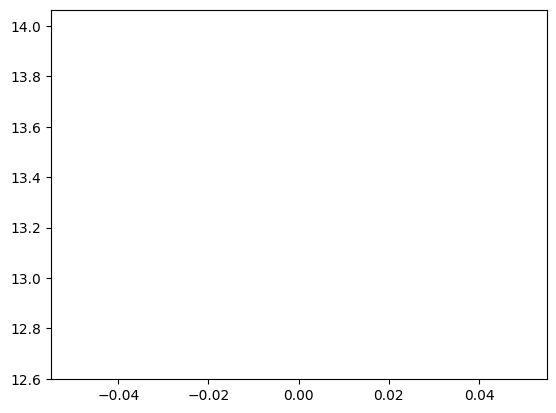

In [26]:
#plots the mean column in y_pred as well as the actual SOC values
import matplotlib.pyplot as plt
plt.plot(y_pred['mean'])
plt.plot(test_data['SOC'][0])
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a tuple

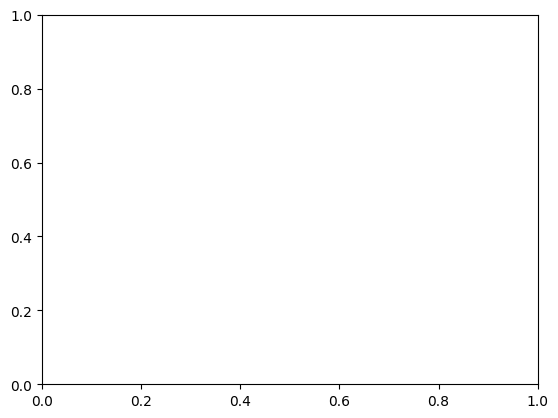

In [ ]:
#plots the predicted vs actual values of the top performing model using matplotlib
import matplotlib.pyplot as plt
plt.plot(y_pred["mean"], label="Predictions")
plt.plot(test_data[label], label="True Values")
plt.legend()
plt.show()

In [ ]:
mse_test = np.mean(((y_pred - test_data[label])**2))
rmse_test = math.sqrt(mse_test)
print("test data rmse", rmse_test)

test data rmse 3.6227905364757076
